In [9]:
import numpy as np
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import json

In [10]:
#Read Chemistry abstract title data from desktop#
documents = []
with open('/Users/ryansong612/Desktop/research-LLM/output/all.json', 'r') as file:
    data = json.load(file)
    for subject in data:
        for article in data[subject]:
            document = { "subject": subject,
                         "title": article["title"],
                         "abstract": article["abstract"]}
            documents.append(document)

#define embedding calculation function#
def embed_sentences(sentences):
    # Load the Universal Sentence Encoder module
    module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
    model = hub.load(module_url)
    # Generate embeddings for the sentences
    embeddings = model(sentences)
    return embeddings

#define similarity calculation function based on dot product#
def compute_similarity(embedding1, embedding2):
    # Compute cosine similarity between two embeddings
    res = np.tensordot(embedding1, embedding2, 1)
    return res

In [11]:
query = input('Enter query: ')
query_vec = embed_sentences([query])[0]
test = [documents[i]["title"]+documents[i]["abstract"] for i in range(len(documents))]
embed = embed_sentences(test)
simi1 = {i: compute_similarity(query_vec,embed[i]) for i in range(len(embed))}

ValueError: Trying to load a model of incompatible/unknown type. '/var/folders/88/nnr56dmj3w7d93f3z9926yj00000gn/T/tfhub_modules/063d866c06683311b44b4992fd46003be952409c' contains neither 'saved_model.pb' nor 'saved_model.pbtxt'.

In [101]:
index_max = max(range(len(simi1)), key=simi1.__getitem__)

In [106]:
index_max

4765

In [107]:
documents[index_max]

{'subject': 'q-bio',
 'title': 'Sparsity-depth Tradeoff in Infinitely Wide Deep Neural Networks',
 'abstract': 'We investigate how sparse neural activity affects the generalization\nperformance of a deep Bayesian neural network at the large width limit. To this\nend, we derive a neural network Gaussian Process (NNGP) kernel with rectified\nlinear unit (ReLU) activation and a predetermined fraction of active neurons.\nUsing the NNGP kernel, we observe that the sparser networks outperform the\nnon-sparse networks at shallow depths on a variety of datasets. We validate\nthis observation by extending the existing theory on the generalization error\nof kernel-ridge regression.\n'}

In [108]:
simi1[5]

array(0.3261717, dtype=float32)

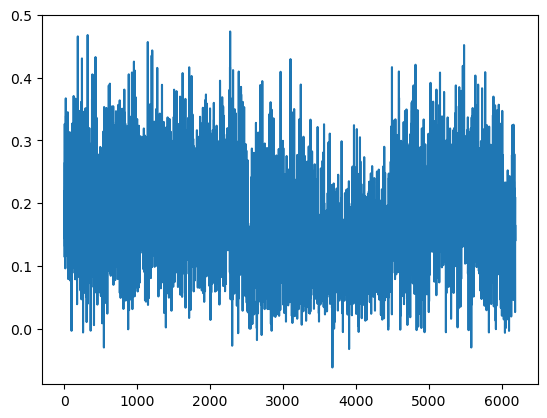

In [109]:
a = list(simi1.values())
plt.plot(a)

In [110]:
def SearchPaper(key_sentence):
    global documents
    results = []
    no = 0
    while no < len(documents):
        content = documents[no]["abstract"] + documents[no]["title"]
        search = content.find(key_sentence)
        if search != -1:
            results.append(no)
        no += 1

    print("Identified these papers (id):")
    msg = "id: {id}\ntitle: {title}\nabstract:\n{abstract}"
    for id in results:
        title = documents[id]['title']
        abstract = documents[id]['abstract']
        print(msg.format(id=id, title=title, abstract=abstract))


In [111]:
maximum = 0
idx = 0
counter = 0

for counter, sim in enumerate(simi1.values()):
    if sim > maximum:
        maximum = sim
        idx = counter

idx

2274

In [112]:
documents[idx]

{'subject': 'cs',
 'title': 'Modelling Concurrency Bugs Using Machine Learning',
 'abstract': 'ificial Intelligence has gained a lot of traction in the recent years,\nwith machine learning notably starting to see more applications across a varied\nrange of fields. One specific machine learning application that is of interest\nto us is that of software safety and security, especially in the context of\nparallel programs. The issue of being able to detect concurrency bugs\nautomatically has intrigued programmers for a long time, as the added layer of\ncomplexity makes concurrent programs more prone to failure. The development of\nsuch automatic detection tools provides considerable benefits to programmers in\nterms of saving time while debugging, as well as reducing the number of\nunexpected bugs. We believe machine learning may help achieve this goal by\nproviding additional advantages over current approaches, in terms of both\noverall tool accuracy as well as programming language flexi

In [83]:
vec1 = embed_sentences(["Explain the effectiveness of the Multi-modal Deep-symphysis Prompt Tuning for Large Pre-trained  Vision-Language Models"])[0]
vec2 = embed_sentences([documents[5]['title']])[0]
similarity = compute_similarity(vec1, vec2)
print(similarity*100)

12.776252627372742


In [84]:
#testing1#
embd1 = embed_sentences(["Application of computer science in mathematics."])[0]
embd2 = embed_sentences(["Application of computer science in mathematics."])[0]
similarity = compute_similarity(embd1, embd2)
print(similarity*100)

100.0


In [85]:
#testing2#
embd1 = embed_sentences(["Application of computer science in mathematics."])[0]
embd2 = embed_sentences(["Application of computer science in mathematics"])[0]
similarity=compute_similarity(embd1, embd2)
print(similarity*100)

100.0


In [86]:
#testing3#
embd1 = embed_sentences(["Application of computer science in mathematics"])[0]
embd2 = embed_sentences(["Application of computer science in mathematics"])[0]
similarity=compute_similarity(embd1, embd2)
print(similarity*100)

100.0


In [87]:
#testing4#
embd1 = embed_sentences(["Application of computer science in mathematics."])[0]
embd2 = embed_sentences(["Application of computer science in mathematics.Tom loves Marry."])[0]
similarity = compute_similarity(embd1, embd2)
print(similarity*100)

57.259440422058105


In [88]:
#testing5#
embd1 = embed_sentences(["Application of computer science in mathematics."])[0]
embd2 = embed_sentences(["Application of computer science in mathematics Tom loves Marry."])[0]
similarity=compute_similarity(embd1, embd2)
print(similarity*100)

65.91236591339111


In [89]:
#testing6#
embd1 = embed_sentences(["Application of computer science in mathematics."])[0]
embd2 = embed_sentences(["Application of computer science in mathematics Tom loves Marry Jerry loves Tom."])[0]
similarity=compute_similarity(embd1, embd2)
print(similarity*100)

41.47316217422485


In [90]:
#testing7#
embd1 = embed_sentences(["Application of computer science in mathematics."])[0]
embd2 = embed_sentences(["Application of computer science in mathematics. Tom loves Marry. Jerry loves Tom."])[0]
similarity=compute_similarity(embd1, embd2)
print(similarity*100)


41.47316217422485


<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [2, 4]]], dtype=int32)>